In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

C:\Users\balda\AppData\Local\Temp\ipykernel_11988\2845678733.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("Data/US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print("The dataset consist of {} records with the following {} columns:".format(len(df), len(df.columns)), '\n')
for i in range(0, 47, 7):
    print(list(df.columns)[i:i+7])

The dataset consist of 7728394 records with the following 46 columns: 

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']
['End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County']
['State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)']
['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)']
['Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit']
['Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [5]:
# percentage of nan values
percentages = df.isna().mean() * 100
percentages = percentages.sort_values(ascending=False)

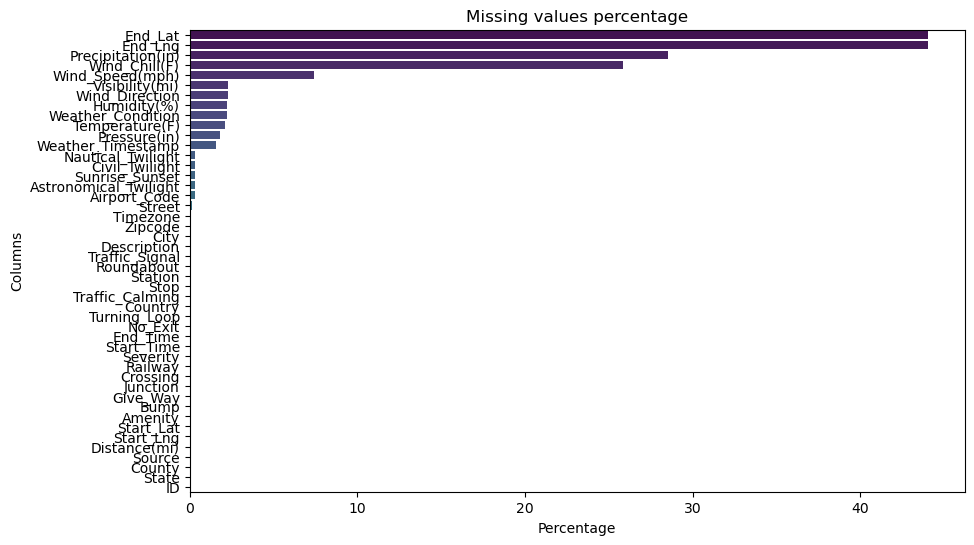

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")
plt.title('Missing values percentage')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()

We can see that there are only a few features where the problem of missing values is significant: **End_Lat** and **End_Lng** have over 40% of missing values - those columns are not vital for our analysis (we also have **Start_Lat** and **Start_Lng** columns that don't suffer from this problem), thus we can just discard them. Missing values ration for **Precipitation(in)** and **Wind_Chill(F)** around 28% and 25%, respectively. The rest of variables have less than 10% missing values, which can be easily solved by an appropriate missing values imputation, such as KNN imputation that would ensure the distributions of features would be sustained, or just by a simple mean or median for columns with small percentages of missing values.

In [6]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

We can divide our features into 3 general categories: location of the accident, weather and traffic conditions. We're going to inspect each of them separately.

## 1. Location

We have 9 columns related to location: 4 categorical ones (**City**, **County**, **State**, **Zipcode**) and 5 continuous (**Start_Lat**, **Start_Lng**, **End_Lat**, **End_Lng**, **Distance(mi)**).

In [10]:
location_cat = ['City', 'County', 'State', 'Zipcode']

for col in location_cat:
    print(col)
    print('Number of unique values:', df[col].nunique(), '\n')

City
Number of unique values: 13678 

County
Number of unique values: 1871 

State
Number of unique values: 49 

Zipcode
Number of unique values: 825094 



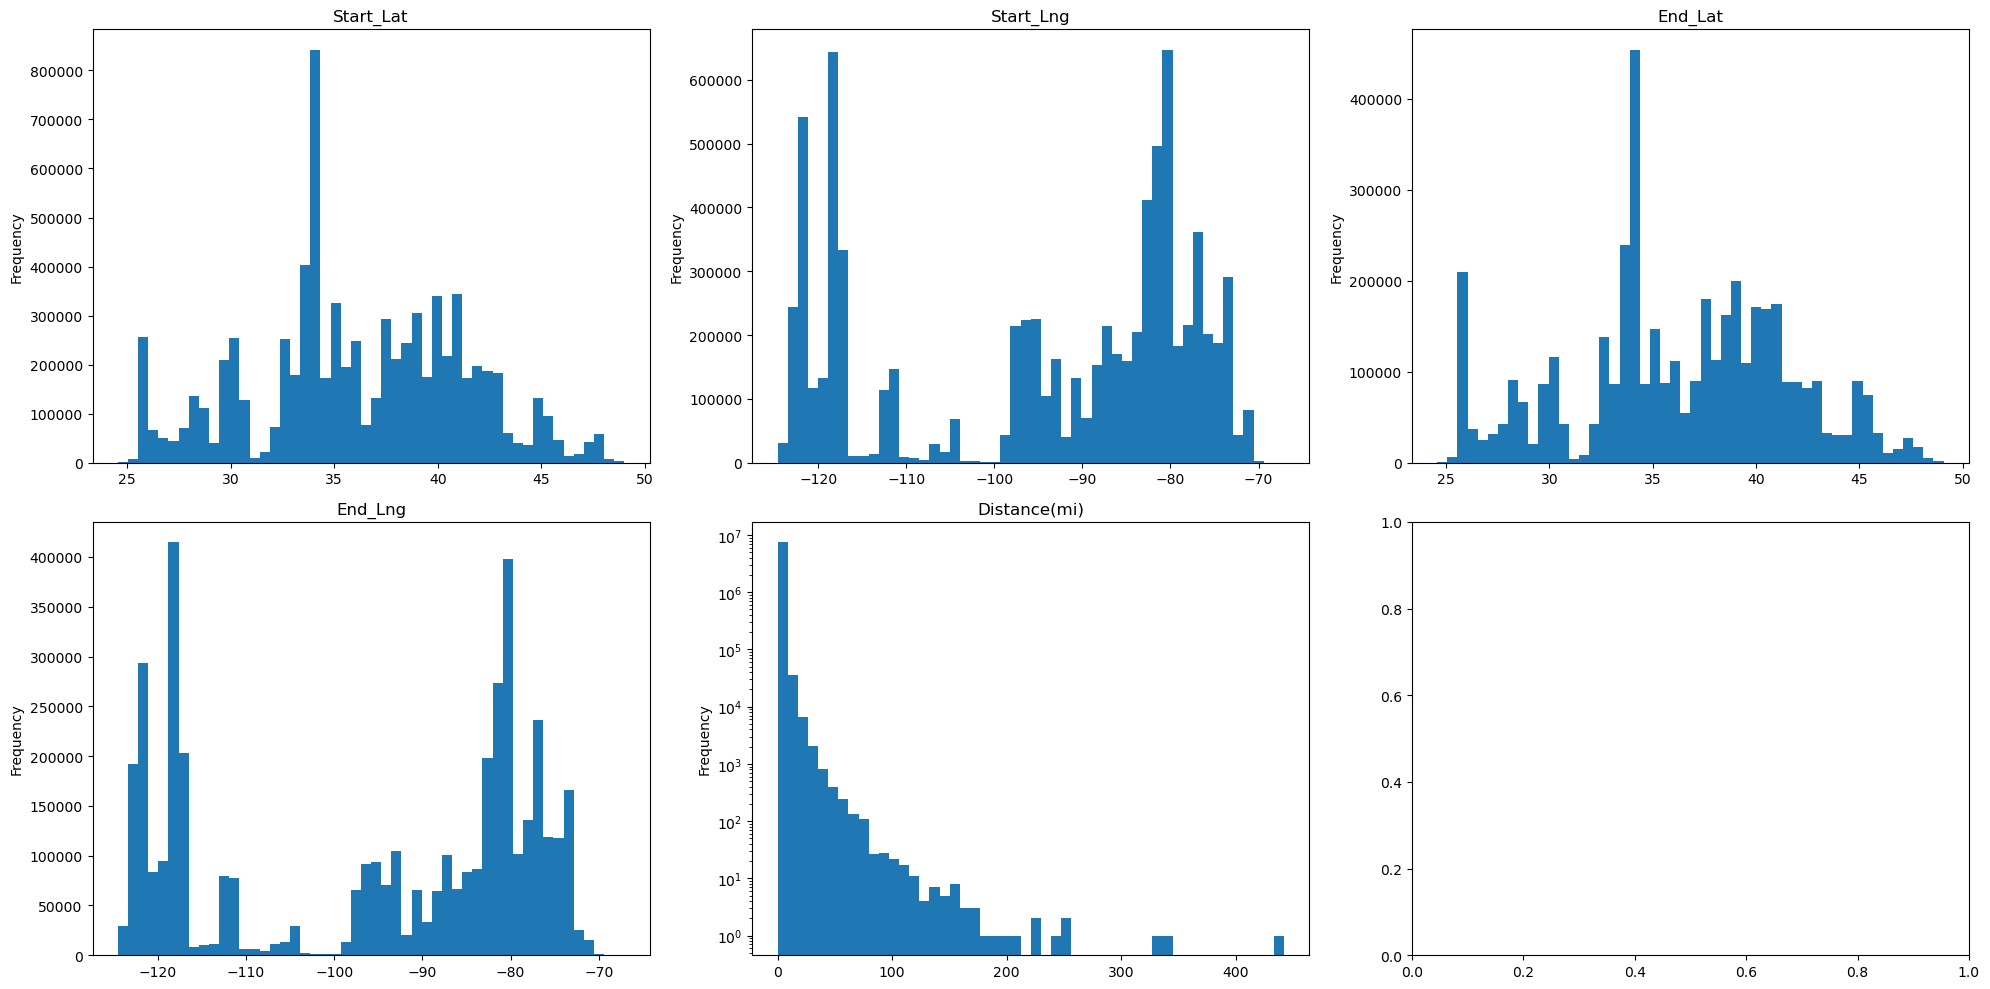

In [16]:
location_cont = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)']

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(location_cont):
    row_index = i // num_cols  # Calculate the row index
    col_index = i % num_cols  # Calculate the column index
    ax = axes[row_index, col_index]  # Access the axis
    df[col].plot(kind='hist', ax=ax, bins=50)
    if col == 'Distance(mi)':
        ax.set_yscale('log')  # Set logarithmic scale for 'Distance(mi)' column
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')    

# Adjust layout
plt.tight_layout()
plt.show()


The plot above shows histogram of each of continuous location columns. We can see that both **Start_Lng** and **End_Lng** have bimodal distributions, **Distance(mi)** seems to follow power-law distribution. Note that we aim to discard **End_Lat**, **End_Lng** and **Distance(mi)** in our analysis.

## 2. Weather

There are 9 columns that seem relevant in our analysis. 2 categorical: **Weather_Condition**, **Wind_Direction**, and 7 continuous: **Temperature(F)**, **Wind_Chill(F)**, **Humidity(%)**, **Pressure(in)**, **Visibility(mi)**, **Wind_Speed(mph)**, **Precipitation(in)**.

In [17]:
weather_cat = ['Weather_Condition', 'Wind_Direction']

for col in weather_cat:
    print(col)
    print('Number of unique values:', df[col].nunique(), '\n')

Weather_Condition
Number of unique values: 144 

Wind_Direction
Number of unique values: 24 



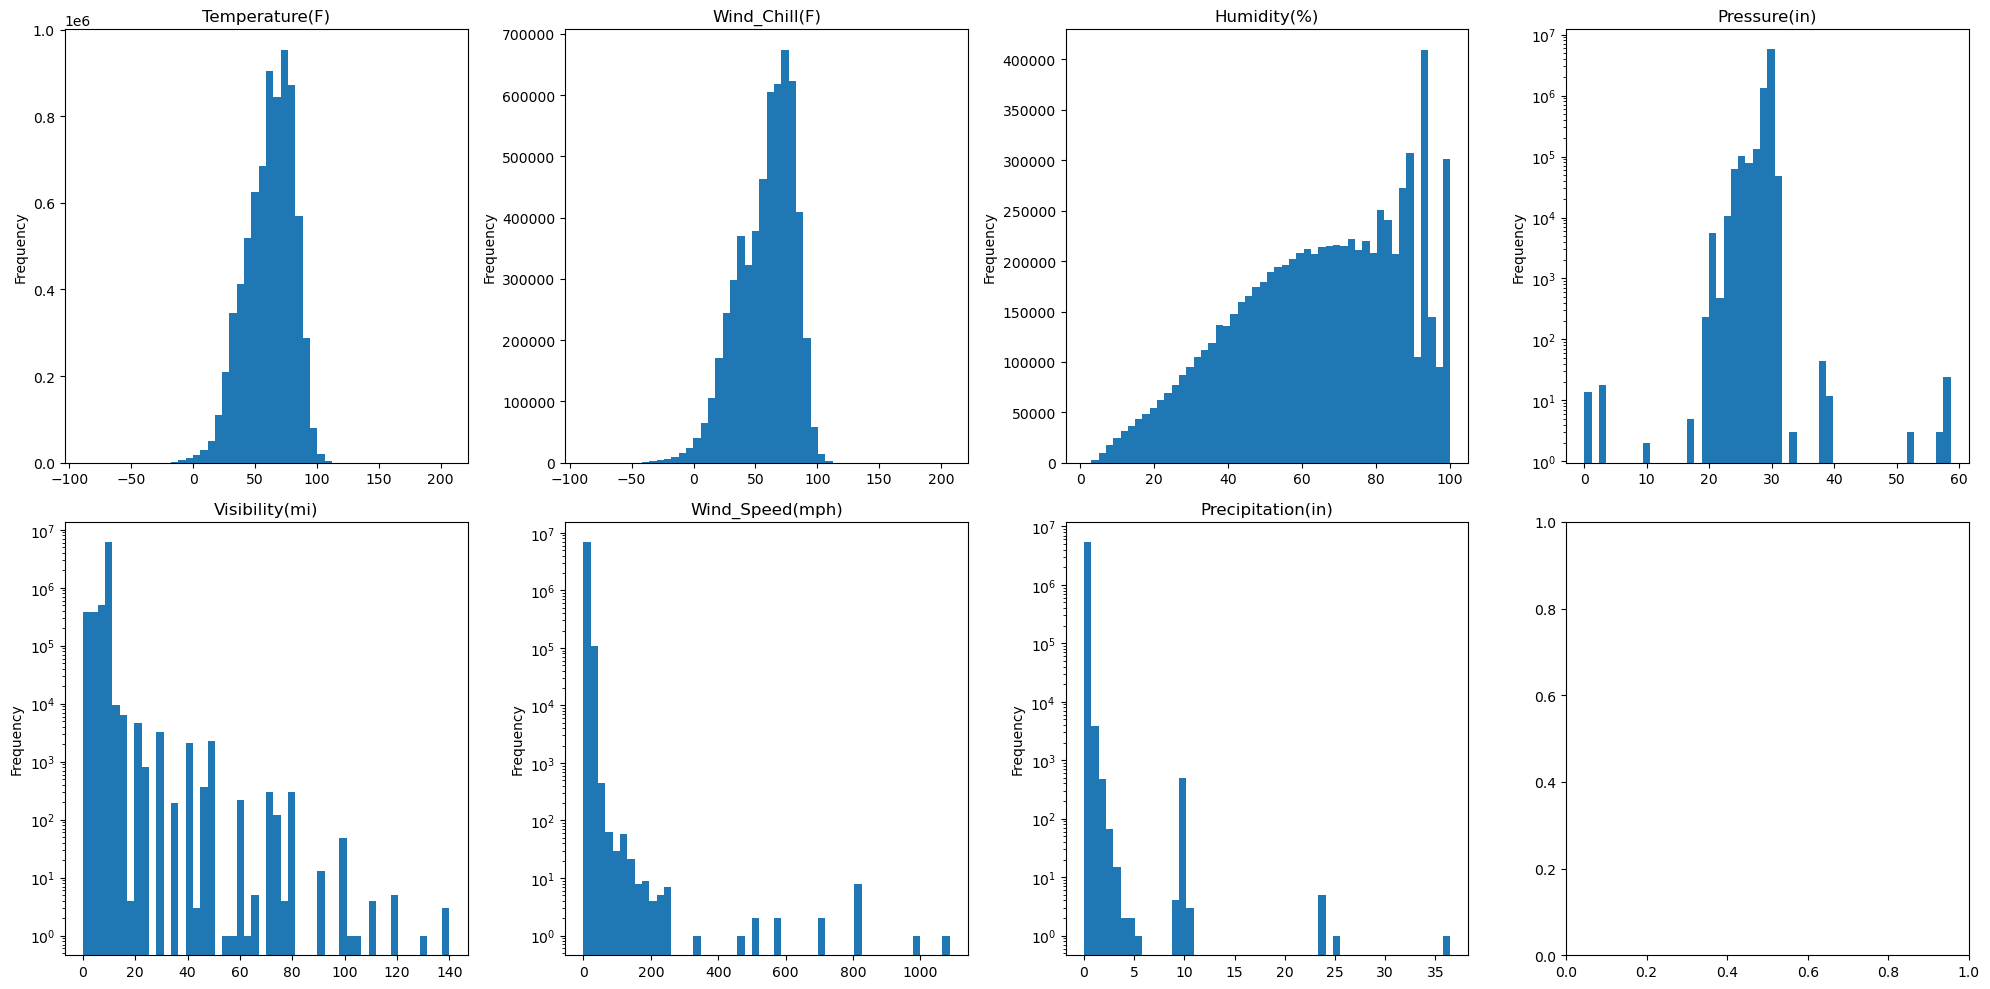

In [21]:
weather_cont = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(weather_cont):
    row_index = i // num_cols  # Calculate the row index
    col_index = i % num_cols  # Calculate the column index
    ax = axes[row_index, col_index]  # Access the axis
    df[col].plot(kind='hist', ax=ax, bins=50)
    if col in ['Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']:
        ax.set_yscale('log')  # Set logarithmic scale for 'Distance(mi)' column
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')    

# Adjust layout
plt.tight_layout()
plt.show()


In the plot above we can see that **Temperature(F)**, **Wind_Chill(F)** and **Pressure(in)** have approximately Gaussian distributions, and **Humidity(%)** has approximately Half-Cauchy distribution.

## 3.Traffic

For traffic category we only have 13 categorical columns that specify if there's a specific object/place in the neighbourhood of the accident, e.g. roundabout, station, or crossing.

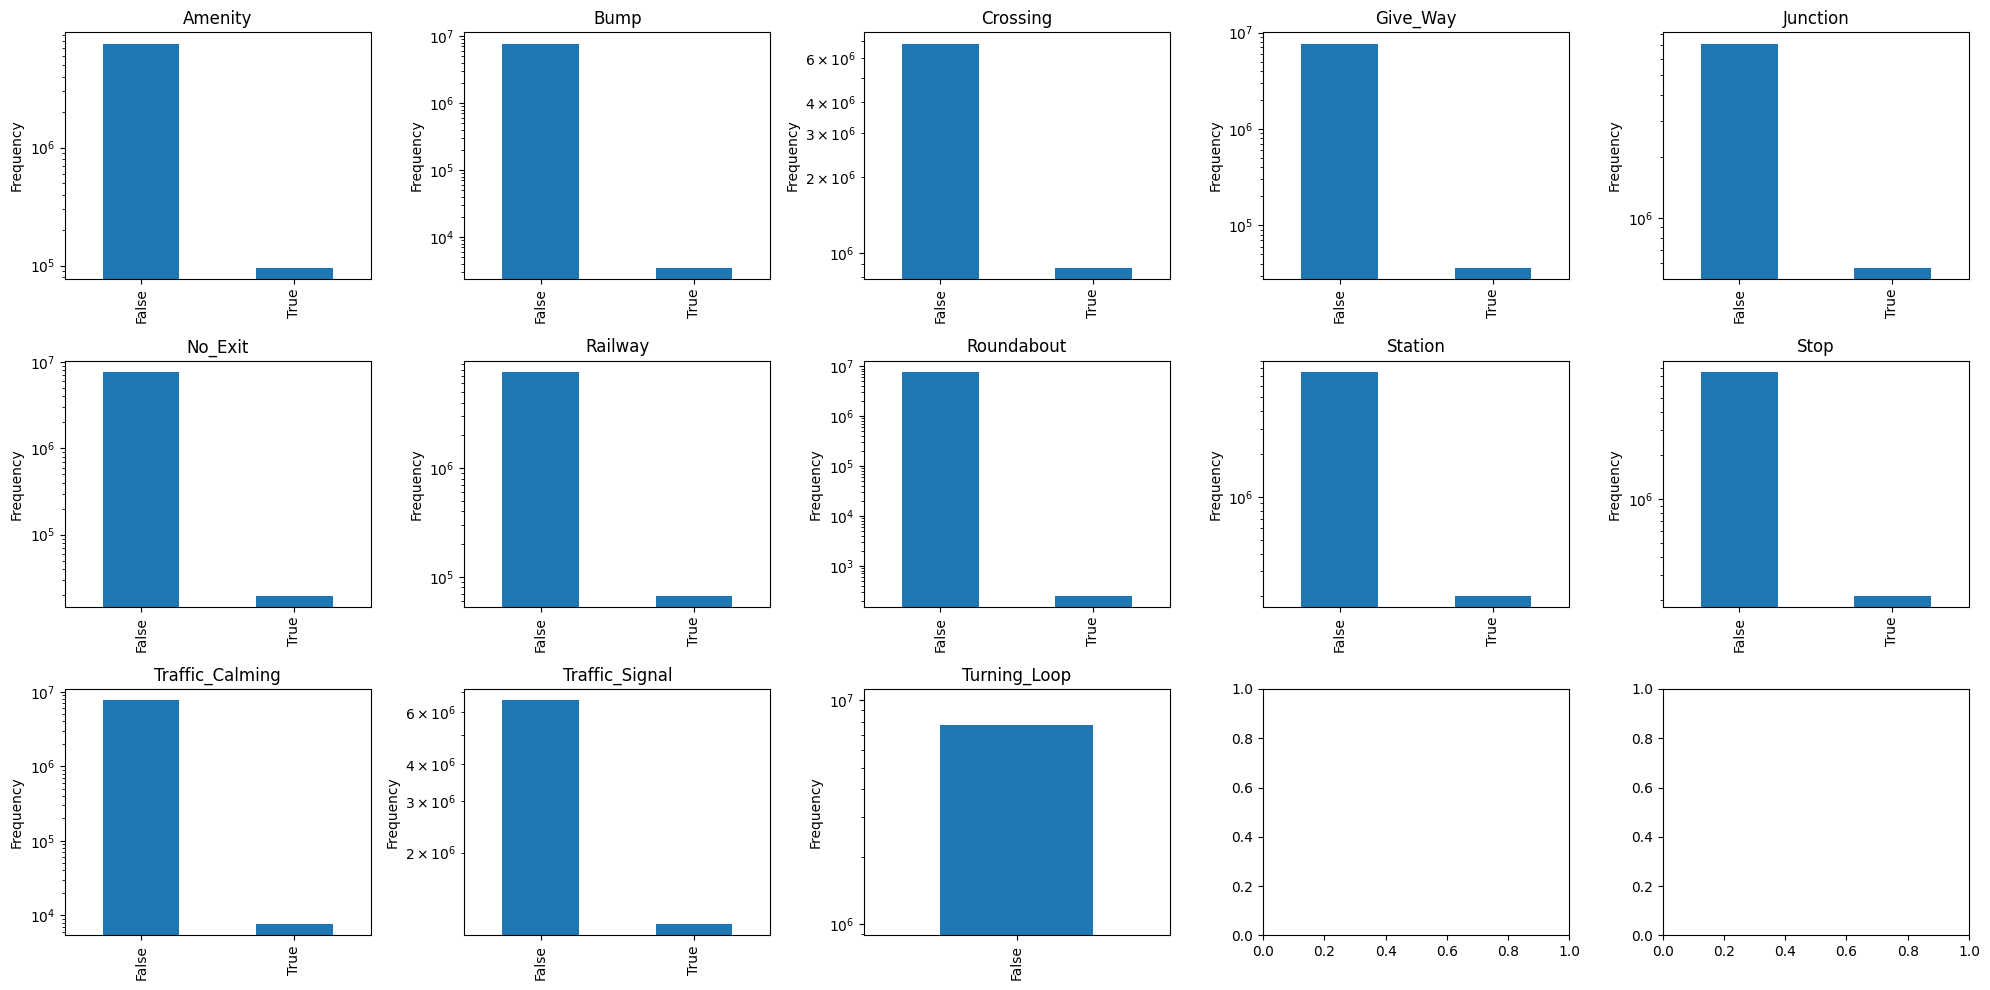

In [6]:
traffic_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way','Junction', 
                'No_Exit', 'Railway', 'Roundabout','Station', 'Stop', 
                'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

num_rows = 3
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(traffic_cols):
    row_index = i // num_cols  # Calculate the row index
    col_index = i % num_cols  # Calculate the column index
    ax = axes[row_index, col_index]  # Access the axis
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_yscale('log')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')    

# Adjust layout
plt.tight_layout()
plt.show()

For all traffic variables, majority of records is equal to false (apart from turning loop, which didn't appear even once in the dataset, thus we can discard this column). Below we can see percentages of True and False values for each column. We can see that traffic calming and bump are most common, appearing in respectively around 15% and 11% of all records.

In [7]:
for i, col in enumerate(traffic_cols):
    print(df[col].value_counts(normalize=True), '\n')

Amenity
False    0.987535
True     0.012465
Name: proportion, dtype: float64 

Bump
False    0.999545
True     0.000455
Name: proportion, dtype: float64 

Crossing
False    0.886941
True     0.113059
Name: proportion, dtype: float64 

Give_Way
False    0.995267
True     0.004733
Name: proportion, dtype: float64 

Junction
False    0.926072
True     0.073928
Name: proportion, dtype: float64 

No_Exit
False    0.997471
True     0.002529
Name: proportion, dtype: float64 

Railway
False    0.991333
True     0.008667
Name: proportion, dtype: float64 

Roundabout
False    0.999968
True     0.000032
Name: proportion, dtype: float64 

Station
False    0.973875
True     0.026125
Name: proportion, dtype: float64 

Stop
False    0.972262
True     0.027738
Name: proportion, dtype: float64 

Traffic_Calming
False    0.999017
True     0.000983
Name: proportion, dtype: float64 

Traffic_Signal
False    0.852004
True     0.147996
Name: proportion, dtype: float64 

Turning_Loop
False    1.0
Name: propo

# Target variable

In our analysis we aim to model severity of accidents (understood as how severe was the impact of accident on traffic), with 1 being the least severe accident and 4 the most severe. Below we can see the distribution of severity variable across the whole dataset.

In [8]:
def plot_severity(data, state=None):
    if state:
        data = data[data['State'] == state]
    plt.hist(data['Severity'], bins=[0.5, 1.5, 2.5, 3.5, 4.5], width=0.7)
    plt.yscale('log')
    plt.xlabel('Severity')
    plt.ylabel('Accident count')
    plt.title('Severity of accidents histogram')
    plt.xticks(range(1, 5))
    plt.show();

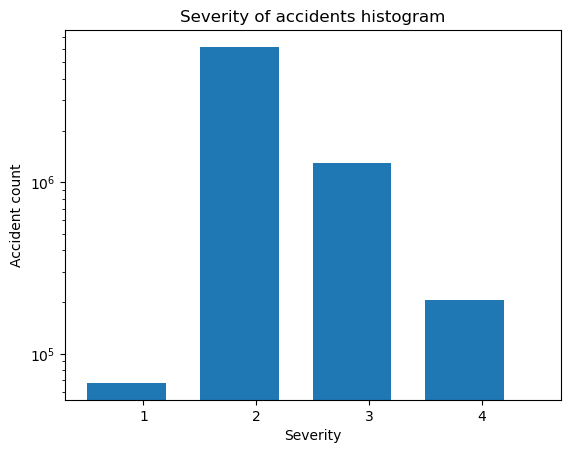

In [9]:
plot_severity(df)

In [10]:
df["Severity"].value_counts(normalize=True)

2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: Severity, dtype: float64

We can see that majority (80%) of accidents have severity equal to 2, 17% of accidents have severity equal to 3, only 2.6% have the highest possible severity and less than one 1% of the records were the least severe.

Below we can see how the situation looked like in separate states:

Text(0.5, 1.02, 'Severity of accidents for different states')

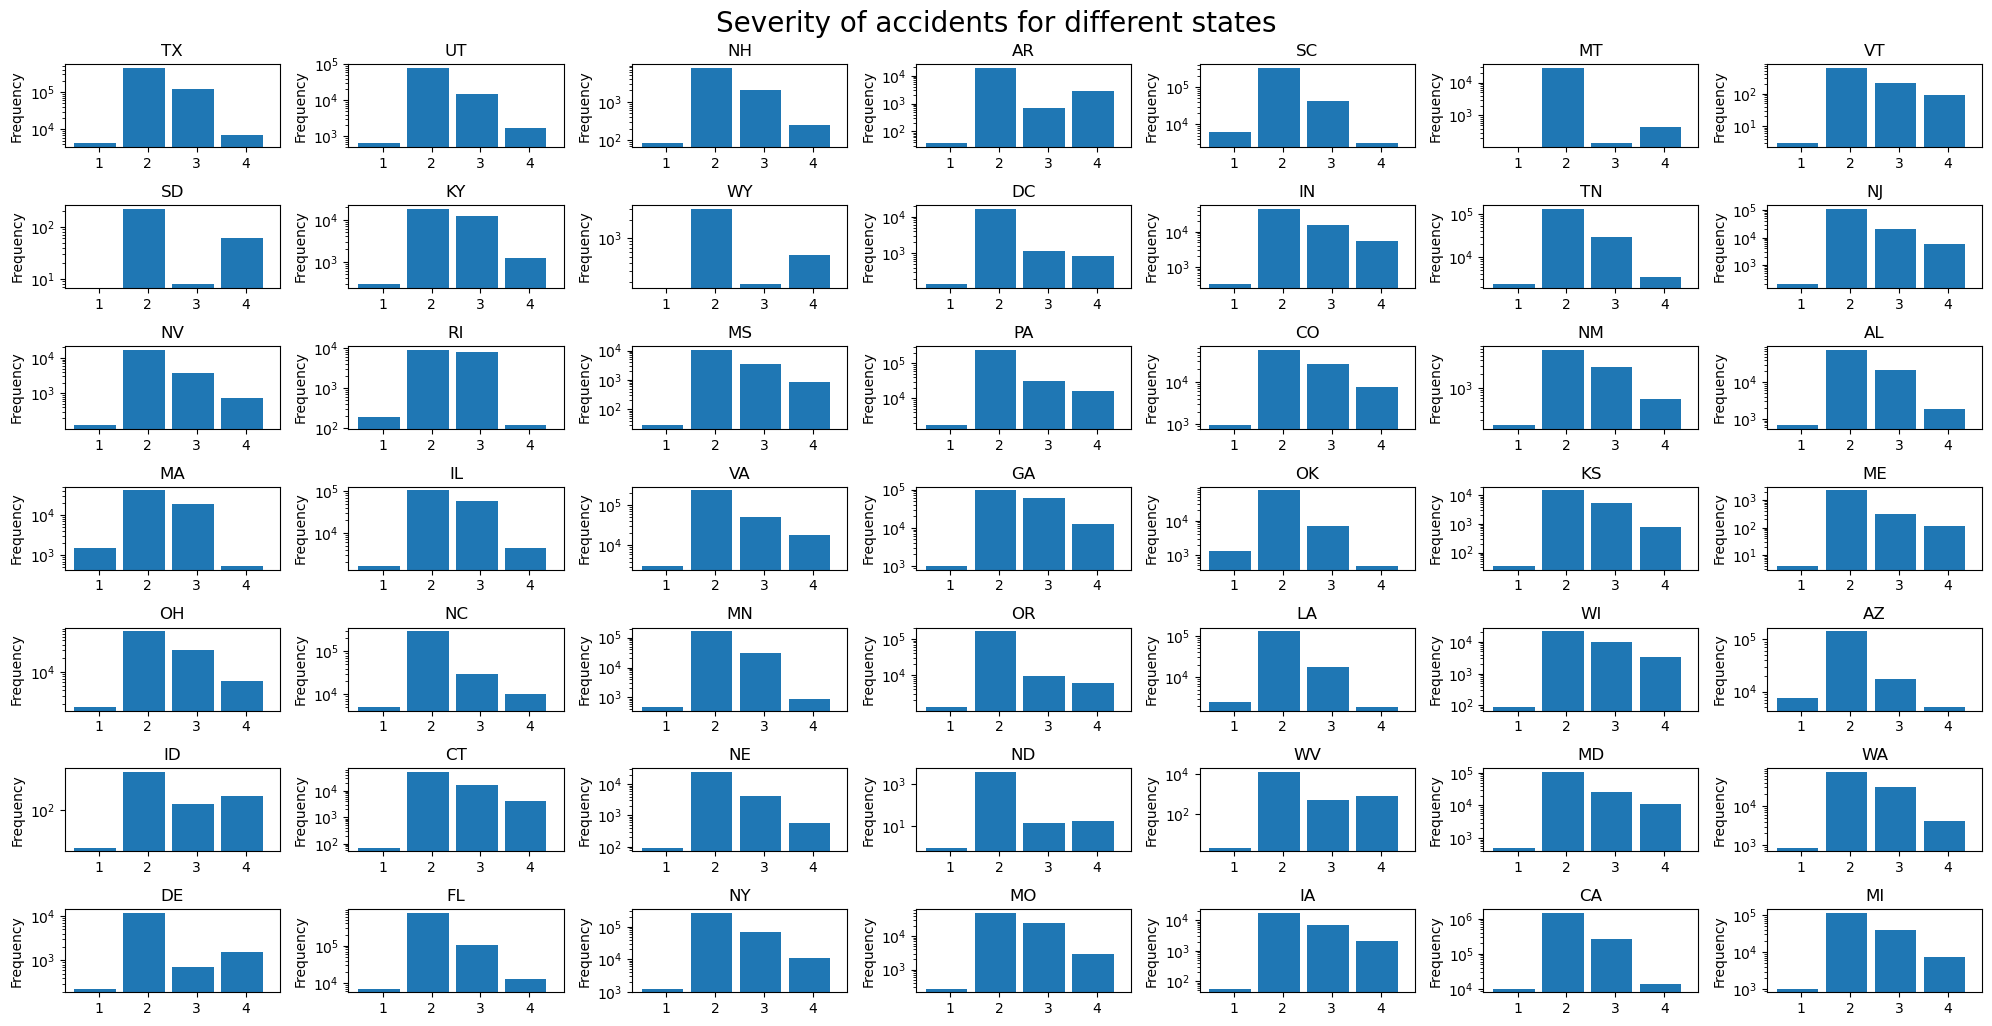

In [11]:
states = set(df['State'].values)

num_rows = 7
num_cols = 7
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust figsize as needed

for i, state in enumerate(states):
    row_index = i // num_cols  # Calculate the row index
    col_index = i % num_cols  # Calculate the column index
    ax = axes[row_index, col_index]  # Access the axis
    df[df['State'] == state]['Severity'].plot(kind='hist', ax=ax, bins=[0.5, 1.5, 2.5, 3.5, 4.5], width=0.85)
    ax.set_xticks(range(1, 5))
    ax.set_yscale('log')
    ax.set_title(state)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')    

# Adjust layout
plt.tight_layout(pad=1.)  # Increase pad value to add space between subplots
plt.suptitle('Severity of accidents for different states', y=1.02, fontsize=20)  # Adjust y value for the suptitle position


We can see that now the situation is quite different: severity equal to 2 still has the highest occurence in all of the states, but there are states like Rhode Island or Kentucky where there's almost the same percentage of accident with severity 2 and 3. There are also states, like Montana, South Dakota or West Virginia, where there are more accidents of severity 4 that severity 3. Looking at the above, it seems interesting to model the accidents' severity for each state instead of for the whole country as a total.

In [13]:
# transform data type 
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year  
# Drop rows where Year is 2023
df = df[df['Year'] != 2023]

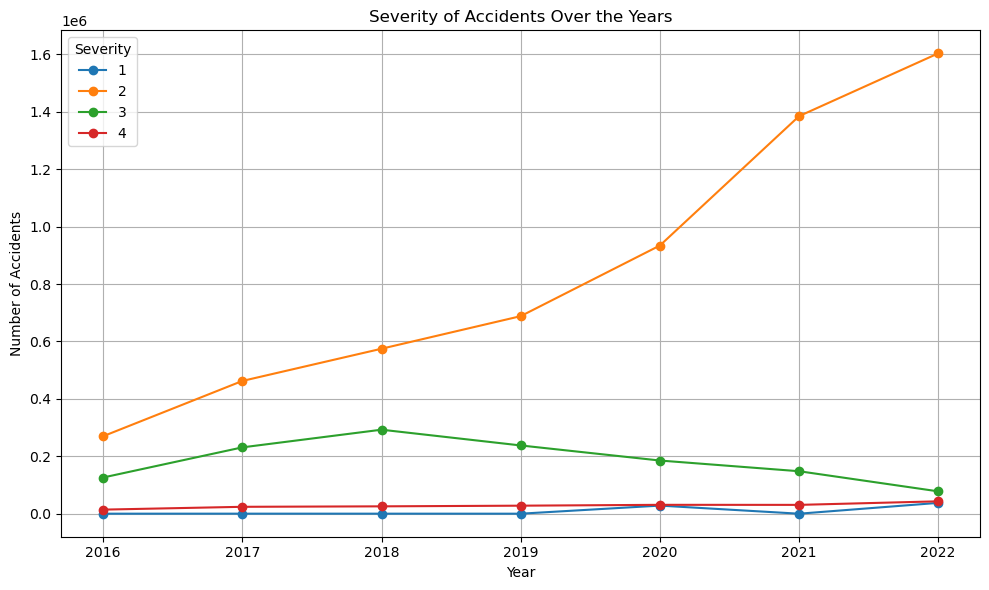

In [14]:
# Group data by year and severity, and count the number of accidents
severity_counts = df.groupby(['Year', 'Severity']).size().unstack(fill_value=0)

# Plot the severity of accidents over the years
severity_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Severity of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

In the plot above we can see how the severity of accidents changed over the years. Number of the most and the least severe accidents was quite stable during the years. Accidents with severity 3 had a peak in 2018, but since then the number of accidents was slowly decreasing throughout the years. What's interesting is that the number of accidents with severity 2 (and a total number of accidents as well) has been sharply increasing every single year.

## Distribution of number of accidents

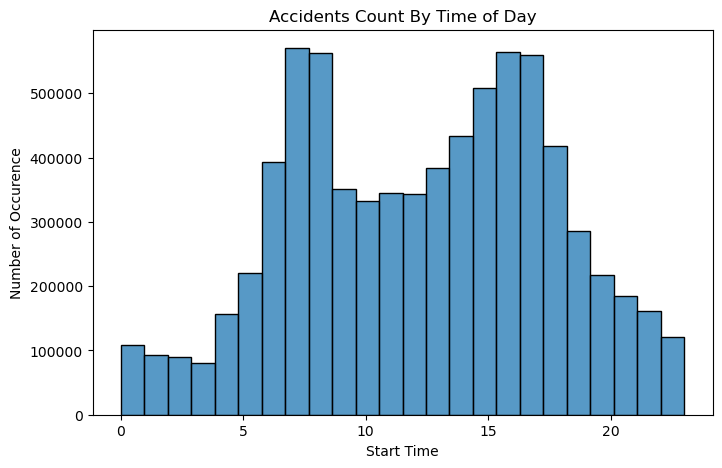

In [15]:
us_accidents = df.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In the ploat above we can see the distribution of number of accidents over the hours of the day. As one could expect, we can observe two peaks: around 9 a.m. and 5 p.m. These are peak hours - people are usually travelling to/from work then, so the probability of an accident in these hours is definitely higher. There is much smaller number of accidents during the night - which is also understandable because there's much less traffic during the night.

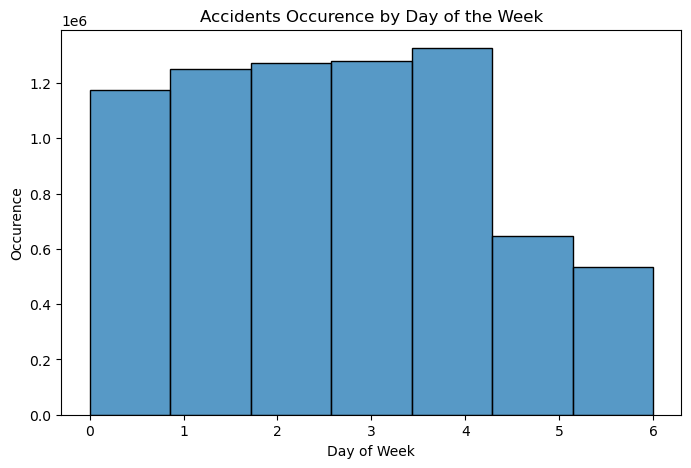

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

We can also see how does the distribution of number of accidents looks like during the week - and this one is also quite intuitive. Most accidents happen during weekdays, with the largest number of accidents on Friday. There's much less accidents on weekends with the smallest number on Sunday. 

In [17]:
saturday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 5]
sunday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 6]

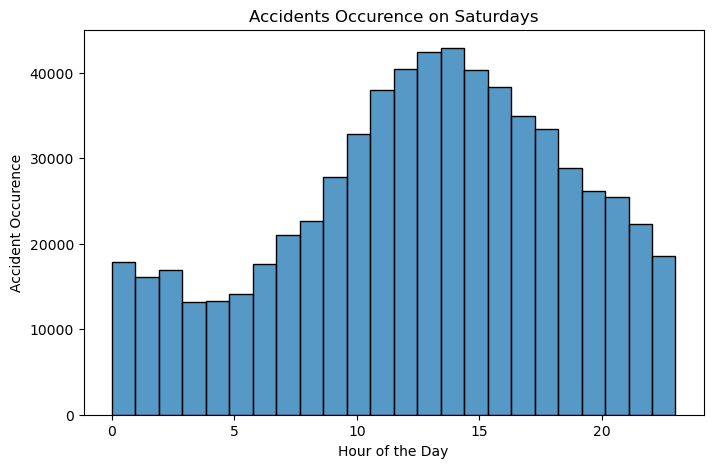

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

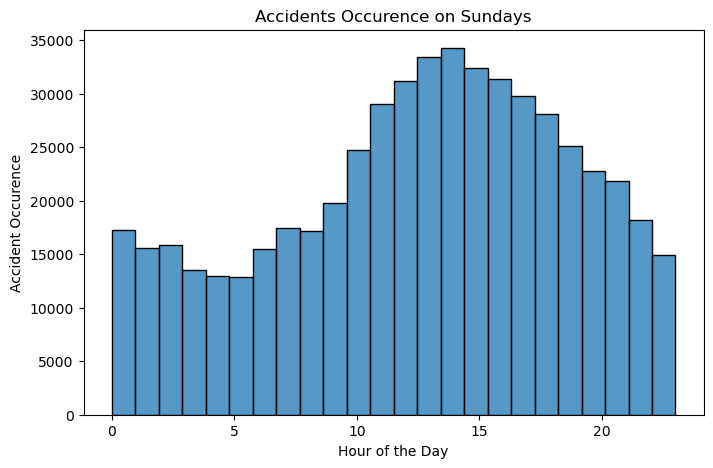

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

We saw before the distribution of number of accidents over the hours. We also decided to inspect how it looks like specifically for Saturdays and Sundays. We can see that the situation is quite different - most accidents happen in the middle of the day, around 15, and the least accidents happen around 5 in the morning.

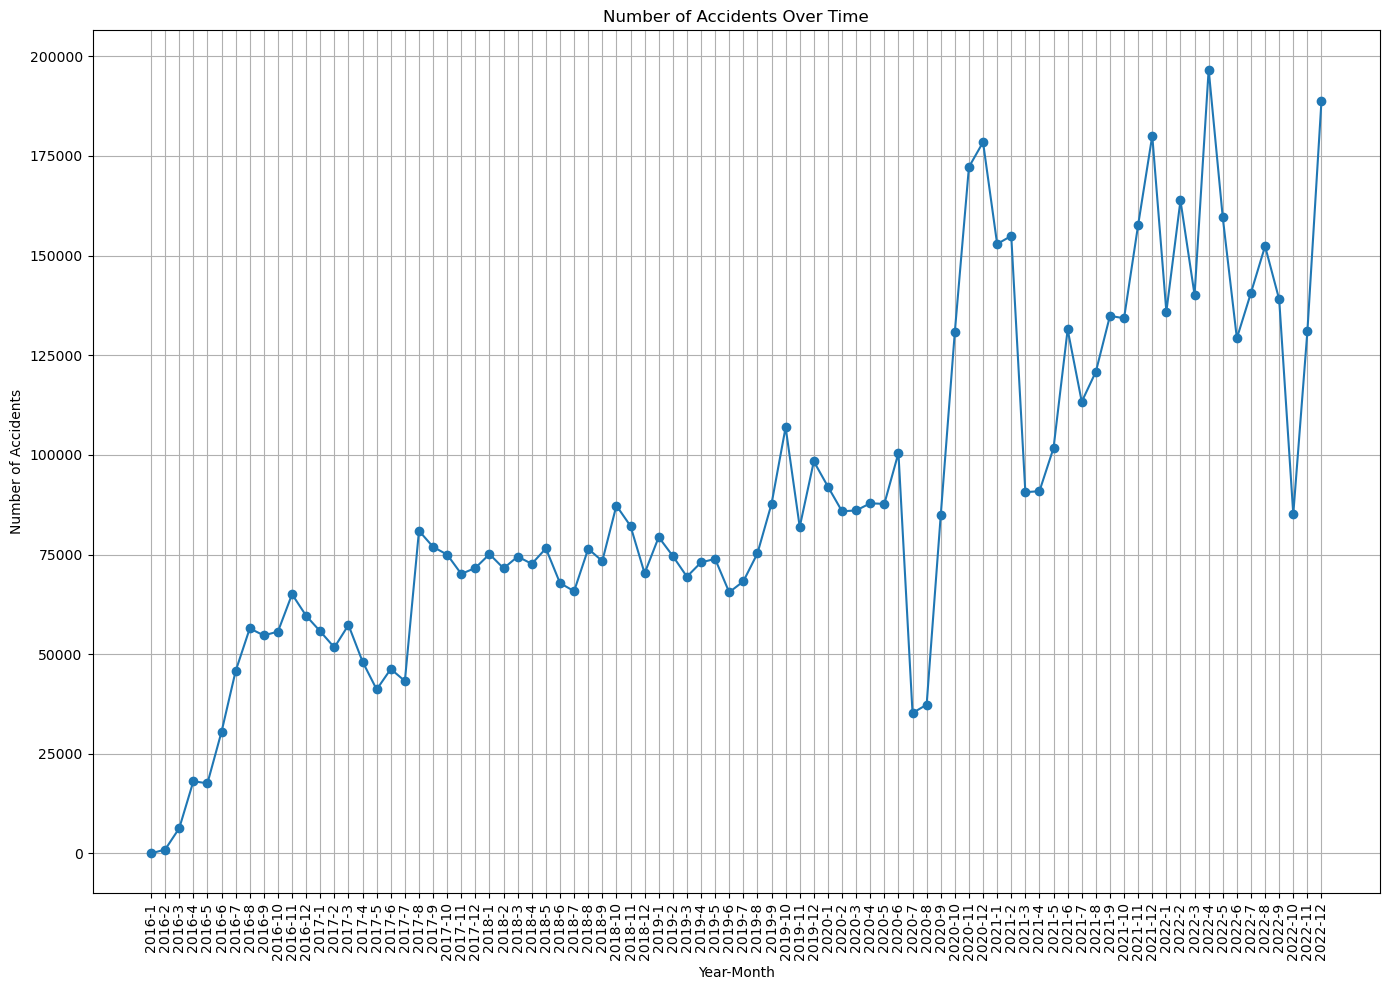

In [21]:
# Extract year and month from 'Start_Time'
us_accidents['Year'] = us_accidents['Start_Time'].dt.year
us_accidents['Month'] = us_accidents['Start_Time'].dt.month

# Group by year and month, and count the number of accidents
accidents_per_month = us_accidents.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Plotting
plt.figure(figsize=(14, 10))
plt.plot(accidents_per_month['Year'].astype(str) + '-' + accidents_per_month['Month'].astype(str), accidents_per_month['Accident_Count'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


Above we can see how the number of accidents changed over the months. There's a general positive trend, but we can also see some interesting patterns. Most years we can see some drops around summer time, and there's one huge drop in July and August 2020. It's probably caused not only by holiday, but also the fact that there was a global pandemic and people were travelling much less. There's also a huge peak right after summer 2020. We can see that we have almost no accidents at the beginning of 2016, which might cause some doubts about quality of the data and poses a question if we should use a whole dataset in our analysis.

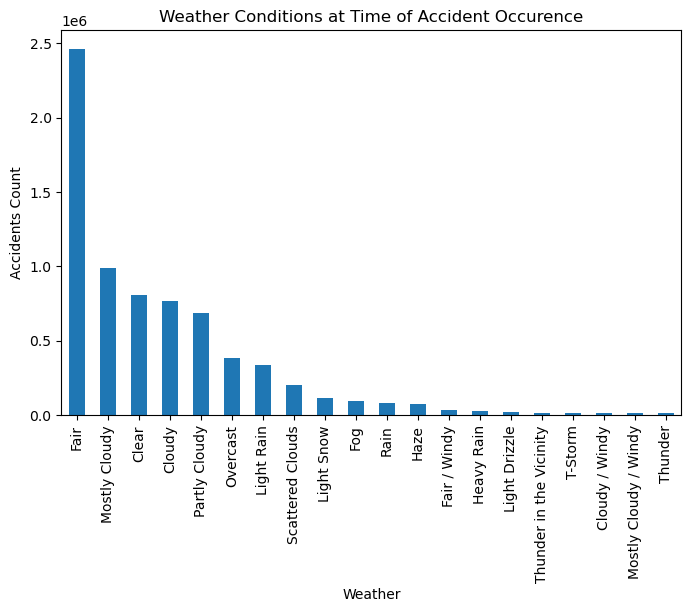

In [22]:
weather_conditions = df.groupby(['Weather_Condition']).count()['ID']

fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

In the plot above we can see the distribution of accidents during specific weather conditions. It's interesting that, contrary to what one may suspect, most accidents happend during fair weather conditions, and much less of them happen during e.g. rain or snow. At the same time we have to remember that when the conditions are difficult less people might decide to drive a car, so the number of accidents is indeed smaller - but the severity might be higher.

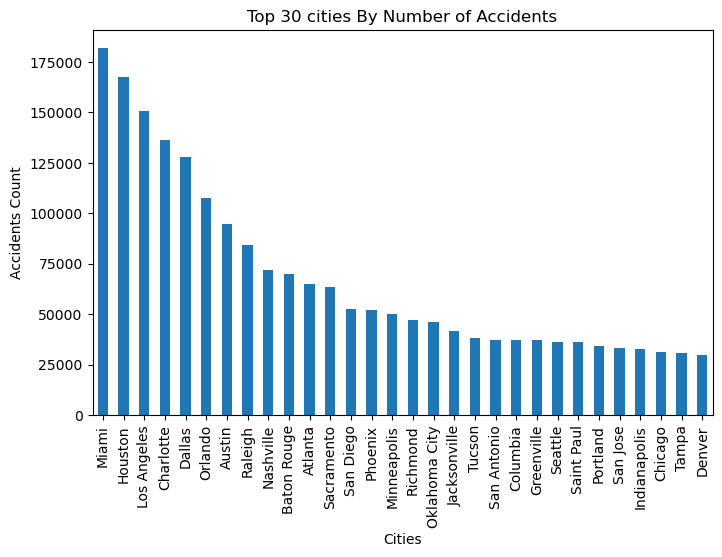

In [23]:
accidents_by_cities = us_accidents['City'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:30].plot(kind='bar')
ax.set(title = 'Top 30 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In the plot above we cann see 30 cities that have the higher number of accidents. Although we shouldn't make any definite conclusions about this distribution without comparing it to the cities' areas or population, we can still see that there are some cities that are much more problematic than others: e.g. Miami has the highest number of accidents, and it's only a 44th city in USA when it comes to population according to 2022 statistics - which is something to look into.

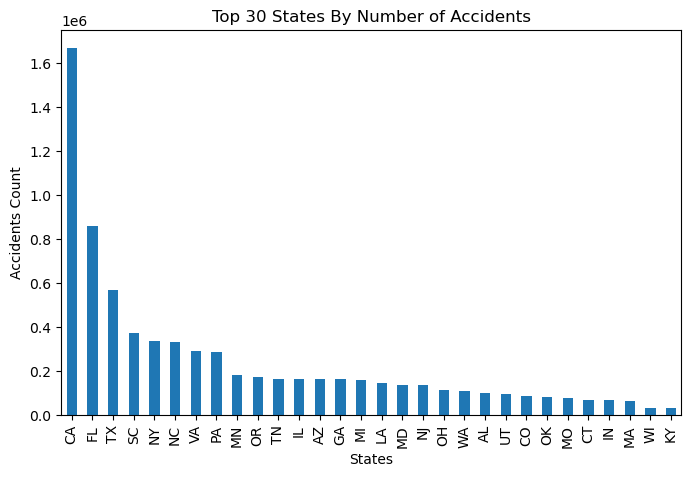

In [24]:
accidents_by_State = df['State'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_State[:30].plot(kind='bar')
ax.set(title = 'Top 30 States By Number of Accidents',
       xlabel = 'States',
       ylabel = 'Accidents Count')
plt.show()

In the plot above we can see the distribution of accidents in different states. There is a highest number of accidents in California, which is the most populous state and the 3rd largest in the US, but there are 2 times more accidents than in Florida (which is the 3rd most populous state, but only 22nd when it comes to area)!